## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

* momentum越高，則accuracy越高。 在momentum=0.95時，accuracy>0.8
* 在nesterov = True時，accuracy較高。

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [19]:
## 超參數設定
LEARNING_RATE = 0.01
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.95, 0.85, 0.75, 0.65, 0.55]

## 1. 不同的 momentum 及使用nesterov

In [23]:
results = {}
"""
使用迴圈，建立不同 MOMENTUM 的模型並訓練
"""
for mt in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with MOMENTUM = %.2f" % (mt))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=mt)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-mt-%s" % str(mt)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with MOMENTUM = 0.95
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==========================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 168us/step - loss: 1.8823 - acc: 0.3281 - val_loss: 1.7318 - val_acc: 0.3877
Epoch 2/50
50000/50000 [==============================] - 9s 176us/step - loss: 1.6770 - acc: 0.4071 - val_loss: 1.6789 - val_acc: 0.3953
Epoch 3/50
50000/50000 [==============================] - 9s 188us/step - loss: 1.5889 - acc: 0.4382 - val_loss: 1.5350 - val_acc: 0.4578
Epoch 4/50
50000/50000 [==============================] - 9s 180us/step - loss: 1.5286 - acc: 0.4592 - val_loss: 1.5467 - val_acc: 0.4546
Epoch 5/50
50000/50000 [==============================] - 9s 172us/step - loss: 1.4757 - acc: 0.4777 - val_loss: 1.5546 - val_acc: 0.4392
Epoch 6/50
50000/50000 [==============================] - 9s 172us/step - loss: 1.4431 - acc: 0.4893 - val_loss: 1.6427 - val_acc: 0.4216
Epoch 7/50
50000/50000 [==============================] - 9s 189us/step - loss: 1.4057 - acc: 0.5025 - val_loss: 1.4927 - 

Epoch 2/50
50000/50000 [==============================] - 8s 161us/step - loss: 1.7410 - acc: 0.3830 - val_loss: 1.7435 - val_acc: 0.3716
Epoch 3/50
50000/50000 [==============================] - 8s 160us/step - loss: 1.6596 - acc: 0.4131 - val_loss: 1.6995 - val_acc: 0.3835
Epoch 4/50
50000/50000 [==============================] - 8s 161us/step - loss: 1.6031 - acc: 0.4339 - val_loss: 1.8506 - val_acc: 0.3559
Epoch 5/50
50000/50000 [==============================] - 8s 170us/step - loss: 1.5583 - acc: 0.4464 - val_loss: 1.5547 - val_acc: 0.4501
Epoch 6/50
50000/50000 [==============================] - 8s 165us/step - loss: 1.5125 - acc: 0.4649 - val_loss: 1.5096 - val_acc: 0.4645
Epoch 7/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.4829 - acc: 0.4752 - val_loss: 1.4942 - val_acc: 0.4733
Epoch 8/50
50000/50000 [==============================] - 8s 165us/step - loss: 1.4507 - acc: 0.4854 - val_loss: 1.5187 - val_acc: 0.4584
Epoch 9/50
50000/50000 [==========

50000/50000 [==============================] - 8s 160us/step - loss: 1.6996 - acc: 0.3988 - val_loss: 1.7121 - val_acc: 0.3809
Epoch 4/50
50000/50000 [==============================] - 8s 160us/step - loss: 1.6405 - acc: 0.4198 - val_loss: 1.6767 - val_acc: 0.3997
Epoch 5/50
50000/50000 [==============================] - 8s 160us/step - loss: 1.6019 - acc: 0.4330 - val_loss: 1.6661 - val_acc: 0.4101
Epoch 6/50
50000/50000 [==============================] - 8s 160us/step - loss: 1.5608 - acc: 0.4488 - val_loss: 1.6600 - val_acc: 0.4120
Epoch 7/50
50000/50000 [==============================] - 8s 160us/step - loss: 1.5341 - acc: 0.4581 - val_loss: 1.6215 - val_acc: 0.4342
Epoch 8/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.4990 - acc: 0.4698 - val_loss: 1.5837 - val_acc: 0.4348
Epoch 9/50
50000/50000 [==============================] - 8s 170us/step - loss: 1.4725 - acc: 0.4804 - val_loss: 1.5380 - val_acc: 0.4492
Epoch 10/50
50000/50000 [====================

50000/50000 [==============================] - 8s 164us/step - loss: 1.6798 - acc: 0.4071 - val_loss: 1.7246 - val_acc: 0.3805
Epoch 5/50
50000/50000 [==============================] - 8s 167us/step - loss: 1.6372 - acc: 0.4221 - val_loss: 1.6293 - val_acc: 0.4215
Epoch 6/50
50000/50000 [==============================] - 8s 162us/step - loss: 1.5982 - acc: 0.4347 - val_loss: 1.5765 - val_acc: 0.4480
Epoch 7/50
50000/50000 [==============================] - 8s 162us/step - loss: 1.5681 - acc: 0.4456 - val_loss: 1.6301 - val_acc: 0.4218
Epoch 8/50
50000/50000 [==============================] - 8s 162us/step - loss: 1.5440 - acc: 0.4545 - val_loss: 1.5841 - val_acc: 0.4404
Epoch 9/50
50000/50000 [==============================] - 8s 162us/step - loss: 1.5196 - acc: 0.4647 - val_loss: 1.6021 - val_acc: 0.4247
Epoch 10/50
50000/50000 [==============================] - 8s 162us/step - loss: 1.4988 - acc: 0.4725 - val_loss: 1.5686 - val_acc: 0.4397
Epoch 11/50
50000/50000 [===================

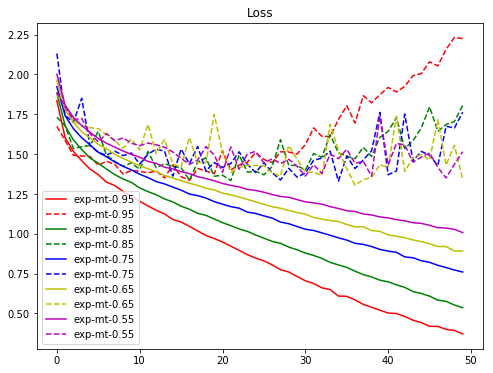

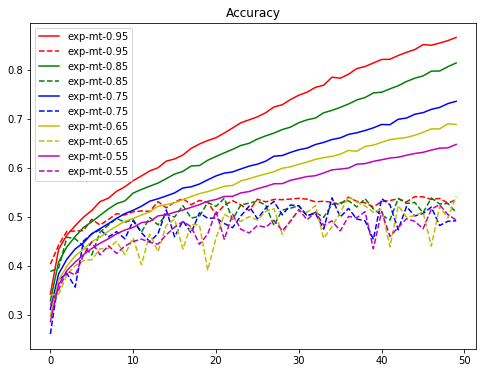

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## 2. 不同的 momentum 及不使用nesterov

In [25]:
results = {}
"""
使用迴圈，建立不同 MOMENTUM 的模型並訓練
"""
for mt in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with MOMENTUM = %.2f" % (mt))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=False, momentum=mt)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-mt-%s" % str(mt)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with MOMENTUM = 0.95
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==========================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 15s 301us/step - loss: 1.9057 - acc: 0.3132 - val_loss: 1.7444 - val_acc: 0.3828
Epoch 2/50
50000/50000 [==============================] - 15s 290us/step - loss: 1.6928 - acc: 0.3984 - val_loss: 1.6215 - val_acc: 0.4217
Epoch 3/50
50000/50000 [==============================] - 14s 285us/step - loss: 1.6140 - acc: 0.4270 - val_loss: 1.6086 - val_acc: 0.4285
Epoch 4/50
50000/50000 [==============================] - 14s 284us/step - loss: 1.5457 - acc: 0.4505 - val_loss: 1.5321 - val_acc: 0.4586
Epoch 5/50
50000/50000 [==============================] - 14s 287us/step - loss: 1.4970 - acc: 0.4677 - val_loss: 1.5146 - val_acc: 0.4623
Epoch 6/50
50000/50000 [==============================] - 14s 282us/step - loss: 1.4584 - acc: 0.4835 - val_loss: 1.4822 - val_acc: 0.4727
Epoch 7/50
50000/50000 [==============================] - 14s 283us/step - loss: 1.4240 - acc: 0.4967 - val_loss: 1.

50000/50000 [==============================] - 15s 302us/step - loss: 1.9290 - acc: 0.3117 - val_loss: 1.7744 - val_acc: 0.3719
Epoch 2/50
50000/50000 [==============================] - 14s 290us/step - loss: 1.7288 - acc: 0.3861 - val_loss: 1.7427 - val_acc: 0.3738
Epoch 3/50
50000/50000 [==============================] - 14s 290us/step - loss: 1.6467 - acc: 0.4184 - val_loss: 1.6631 - val_acc: 0.4159
Epoch 4/50
50000/50000 [==============================] - 14s 290us/step - loss: 1.5868 - acc: 0.4391 - val_loss: 1.5553 - val_acc: 0.4449
Epoch 5/50
50000/50000 [==============================] - 14s 283us/step - loss: 1.5429 - acc: 0.4549 - val_loss: 1.5185 - val_acc: 0.4577
Epoch 6/50
50000/50000 [==============================] - 14s 287us/step - loss: 1.5014 - acc: 0.4688 - val_loss: 1.5581 - val_acc: 0.4461
Epoch 7/50
50000/50000 [==============================] - 15s 290us/step - loss: 1.4673 - acc: 0.4795 - val_loss: 1.4925 - val_acc: 0.4732
Epoch 8/50
50000/50000 [==============

Epoch 2/50
50000/50000 [==============================] - 14s 287us/step - loss: 1.7699 - acc: 0.3737 - val_loss: 1.7765 - val_acc: 0.3608
Epoch 3/50
50000/50000 [==============================] - 14s 282us/step - loss: 1.6946 - acc: 0.3995 - val_loss: 1.6968 - val_acc: 0.3945
Epoch 4/50
50000/50000 [==============================] - 14s 289us/step - loss: 1.6345 - acc: 0.4219 - val_loss: 1.6557 - val_acc: 0.4108
Epoch 5/50
50000/50000 [==============================] - 16s 311us/step - loss: 1.5916 - acc: 0.4384 - val_loss: 1.5846 - val_acc: 0.4402
Epoch 6/50
50000/50000 [==============================] - 14s 287us/step - loss: 1.5503 - acc: 0.4527 - val_loss: 1.5845 - val_acc: 0.4395
Epoch 7/50
50000/50000 [==============================] - 15s 290us/step - loss: 1.5202 - acc: 0.4611 - val_loss: 1.5235 - val_acc: 0.4596
Epoch 8/50
50000/50000 [==============================] - 14s 290us/step - loss: 1.4889 - acc: 0.4746 - val_loss: 1.5062 - val_acc: 0.4616
Epoch 9/50
50000/50000 [===

50000/50000 [==============================] - 7s 150us/step - loss: 1.7267 - acc: 0.3923 - val_loss: 1.7238 - val_acc: 0.3827
Epoch 4/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.6694 - acc: 0.4133 - val_loss: 1.7056 - val_acc: 0.3998
Epoch 5/50
50000/50000 [==============================] - 8s 154us/step - loss: 1.6236 - acc: 0.4292 - val_loss: 1.6460 - val_acc: 0.4156
Epoch 6/50
50000/50000 [==============================] - 8s 154us/step - loss: 1.5882 - acc: 0.4413 - val_loss: 1.5749 - val_acc: 0.4442
Epoch 7/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.5550 - acc: 0.4526 - val_loss: 1.5739 - val_acc: 0.4418
Epoch 8/50
50000/50000 [==============================] - 8s 151us/step - loss: 1.5303 - acc: 0.4589 - val_loss: 1.5253 - val_acc: 0.4525
Epoch 9/50
50000/50000 [==============================] - 7s 150us/step - loss: 1.5025 - acc: 0.4710 - val_loss: 1.5854 - val_acc: 0.4266
Epoch 10/50
50000/50000 [====================

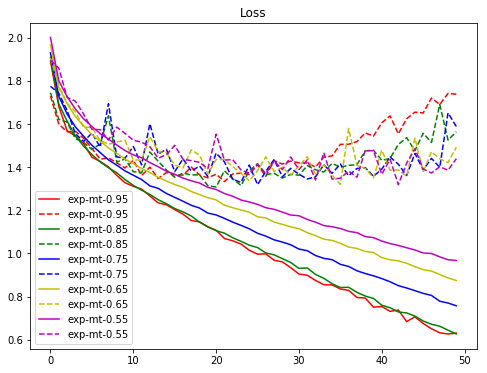

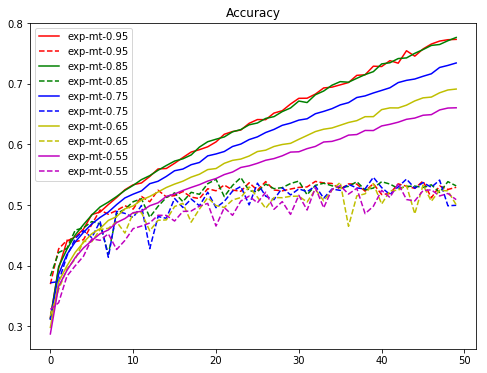

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()